In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import animation
import seaborn as sns

import h5py
import os, sys
sys.path.append('data/')

from IPython.display import Image
from voxelgrid import VoxelGrid
from plot3D import *

style.use("ggplot")
sns.set_style("white")

In [2]:
%matplotlib inline
plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'gray'

In [4]:
digits = []

with h5py.File("data/train_point_clouds.h5", 'r') as h5:
    for i in range(15):
        d = h5[str(i)]
        digits.append((d["img"][:],d["points"][:],d.attrs["label"]))

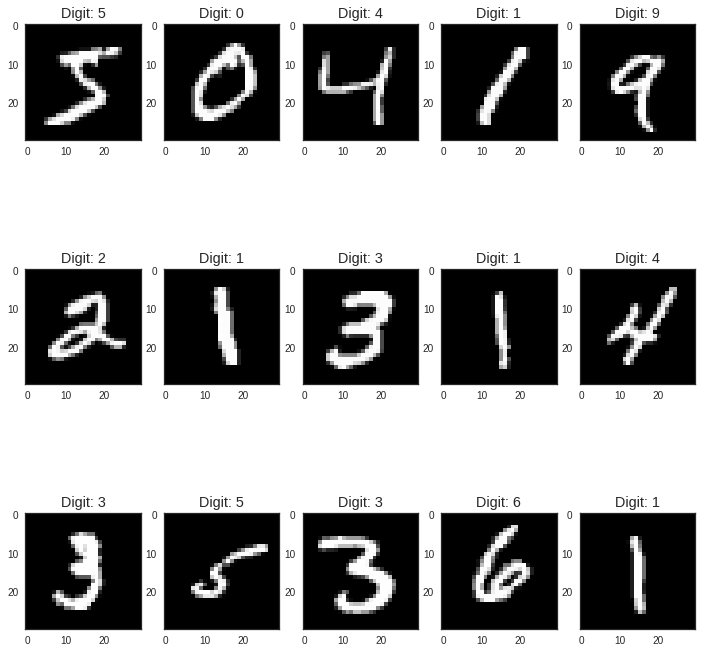

In [5]:
fig, axs = plt.subplots(3,5, figsize=(12, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

for ax, d in zip(axs.ravel(), digits):
    ax.imshow(d[0][:])
    ax.set_title("Digit: " + str(d[2]))        

In [6]:
voxels = []
for d in digits:
    voxels.append(VoxelGrid(d[1], x_y_z=[16,16,16]))

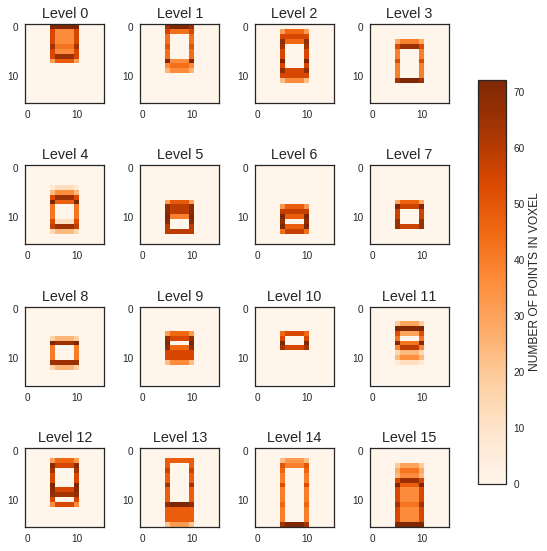

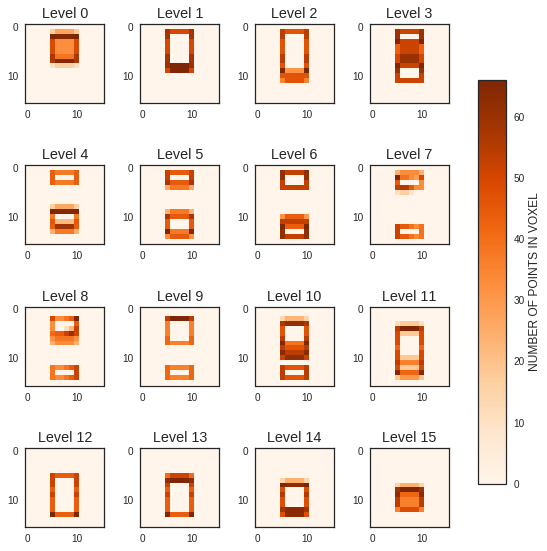

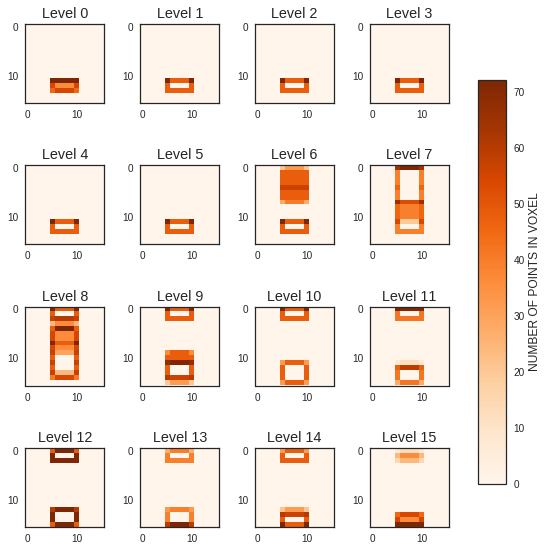

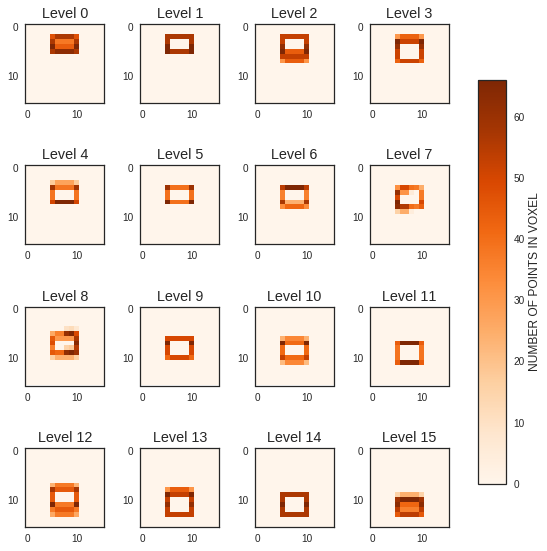

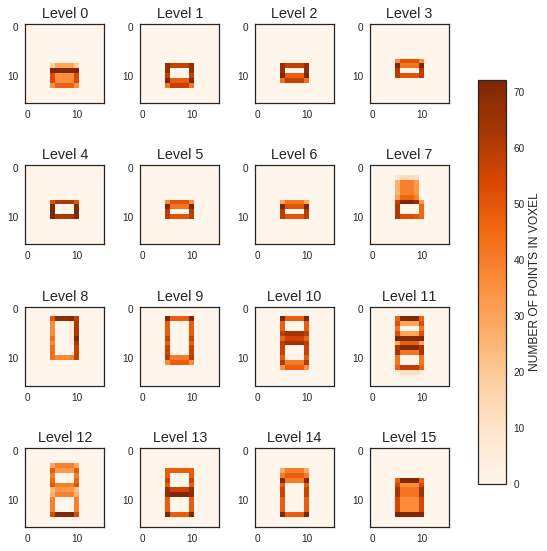

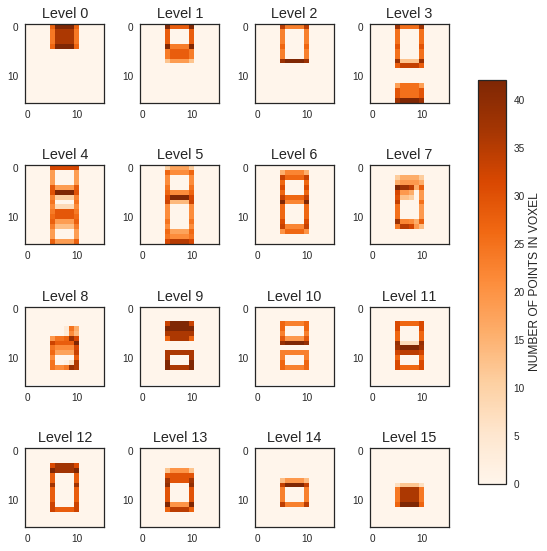

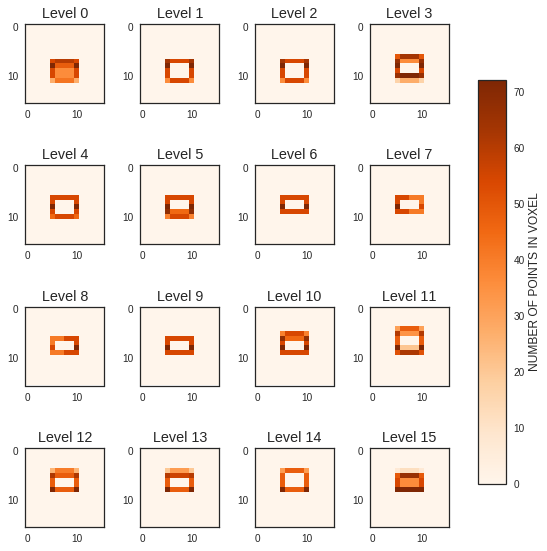

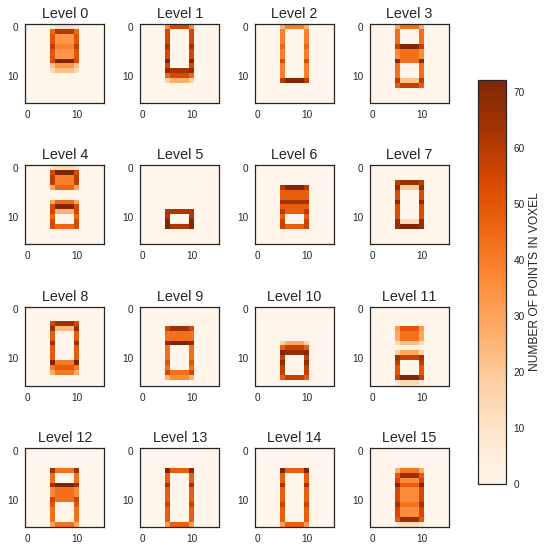

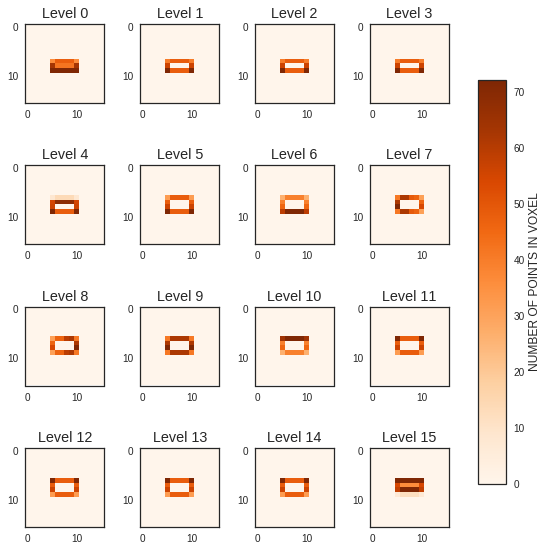

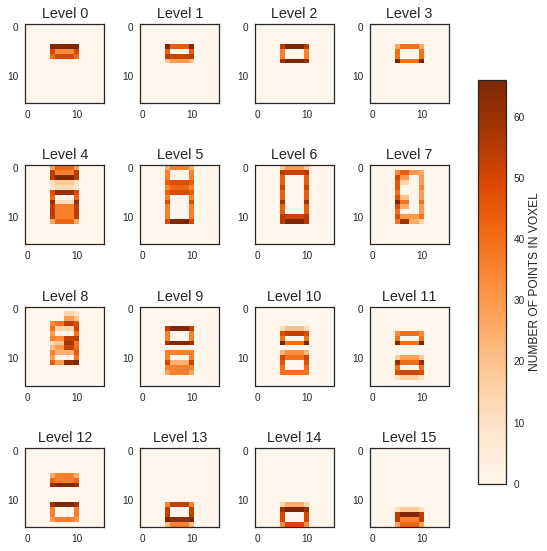

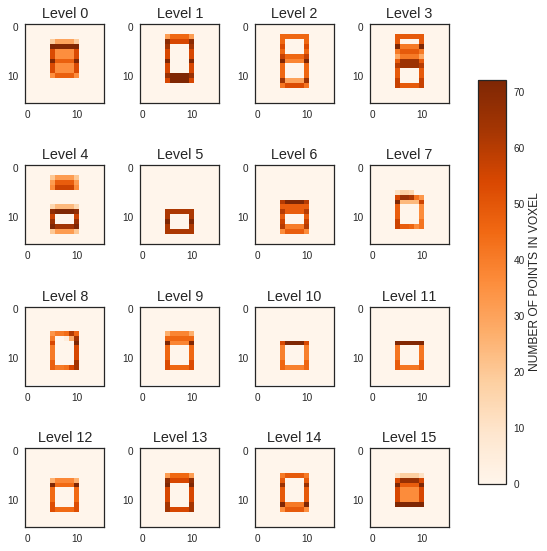

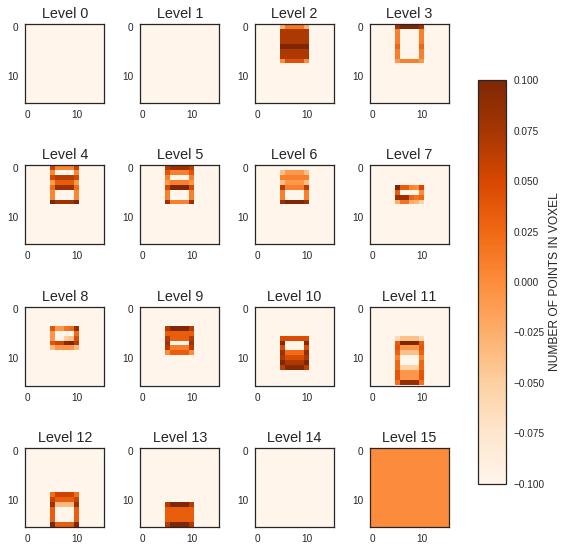

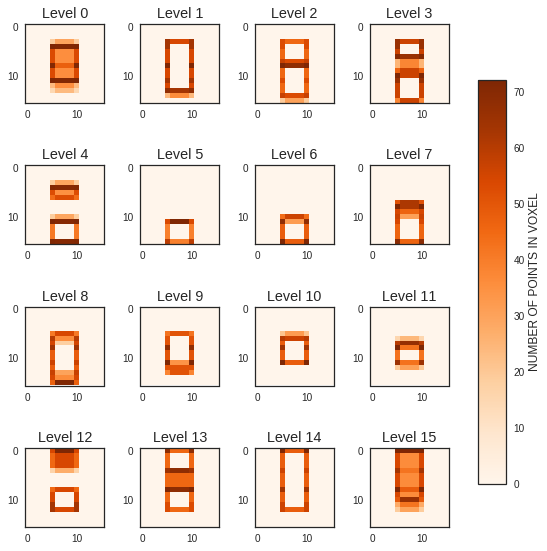

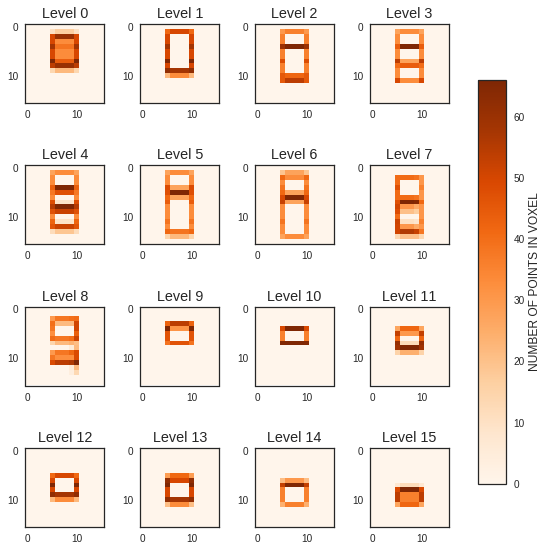

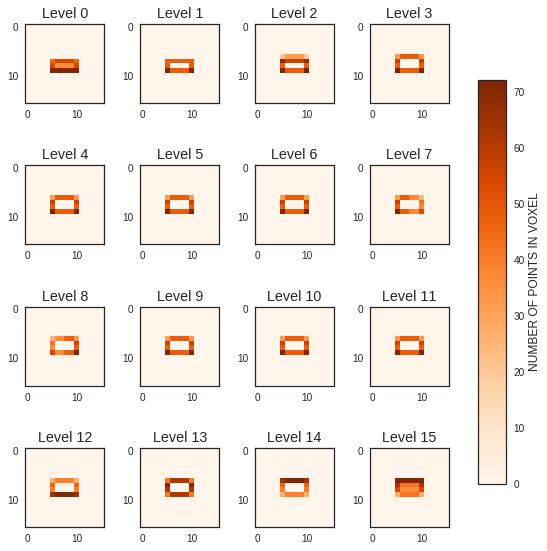

In [7]:
for v in voxels:
    v.plot()

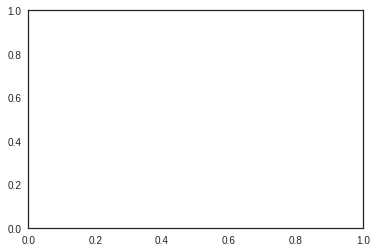

In [9]:
sample = voxels[0].vector.reshape(16, 16, 16)
fig, ax = plt.subplots()

In [11]:
cloud_vis = np.concatenate((digits[14][1], voxels[14].structure), axis=1)
np.savetxt('Cloud Visualization - ' + str(digits[14][2]) + '.txt', cloud_vis)

In [12]:
def animate(i, direction):
    ax.set_title(str(i+1) + ' of ' + str(sample.shape[0]))
    ax.set_axis_off()
    if direction == 'x':
        return ax.imshow(sample[i, :, :], cmap="gray", origin="lower")
    if direction == 'y':
        return ax.imshow(sample[:, i, :], cmap="gray", origin="lower")
    if direction == 'z':
        return ax.imshow(sample[:, :, i], cmap="gray", origin="lower")

In [13]:
anim_x = animation.FuncAnimation(fig, animate, frames=np.arange(0,16), fargs='x')
anim_y = animation.FuncAnimation(fig, animate, frames=np.arange(0,16), fargs='y')
anim_z = animation.FuncAnimation(fig, animate, frames=np.arange(0,16), fargs='z')

In [48]:
anim_x.save('anim_x1.gif', writer='imagemagick')
anim_y.save('anim_y1.gif', writer='imagemagick')
anim_z.save('anim_z1.gif', writer='imagemagick')

In [3]:
with h5py.File("data/full_dataset_vectors.h5", 'r') as h5:
    X_train, y_train = h5["X_train"][:], h5["y_train"][:]
    X_test, y_test = h5["X_test"][:], h5["y_test"][:]

In [4]:
print("Train Data: ")
print(X_train.shape)
print(y_train.shape)
print("\nTest Data: ")
print(X_test.shape)
print(y_test.shape)

Train Data: 
(10000, 4096)
(10000,)

Test Data: 
(2000, 4096)
(2000,)


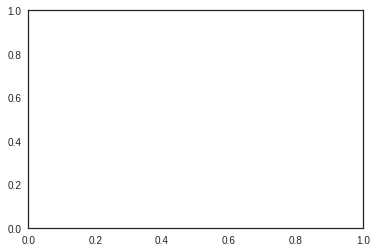

In [5]:
# 16 * 16 * 16 voxel grids
sample = X_train[5000].reshape(16,16,16)
fig, ax = plt.subplots()

# Train Sklearn Classifiers

In [6]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

## 1. Logistic Regression

In [7]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
print("Accuracy: ", reg.score(X_test,y_test))

Accuracy:  0.582


## 2. Decision Tree

In [8]:
dt = DecisionTreeClassifier()
#dt.fit(X_train,y_train)

In [13]:
print("Accuracy: ", dt.score(X_test,y_test))

Accuracy:  0.4865


## 3. KNN

In [9]:
knn = KNN()
#knn.fit(X_train,y_train)

In [16]:
print("Accuracy: ", knn.score(X_test,y_test))

Accuracy:  0.5905


## 4. SVM

In [11]:
svm = LinearSVC()
svm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
print("Accuracy: ", svm.score(X_test,y_test))

Accuracy:  0.557


## 5. Random Forests

In [13]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
print("Accuracy: ", rf.score(X_test,y_test))

Accuracy:  0.685


## Further Analysis

In [21]:
pred = reg.predict(X_test)
miss = np.where(pred != y_test)[0]

In [56]:
with h5py.File("train_point_clouds.h5", "r") as h5:
    a = list(h5.keys())
    #wrong = []
    #for i in miss:
    #    wrong.append((h5[str(i)]["img"][:], pred[i], y_test[i]))
len(a)

5000

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(10,10))

random_idx = np.random.randint(0, len(wrong), 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(wrong[random_idx[i]][0])
    ax.set_title("PREDICTION: "+ str(wrong[random_idx[i]][1]) + "\n" +
                "TRUE: " + str(wrong[random_idx[i]][2]))
    ax.set_xticks([])
    ax.set_yticks([])

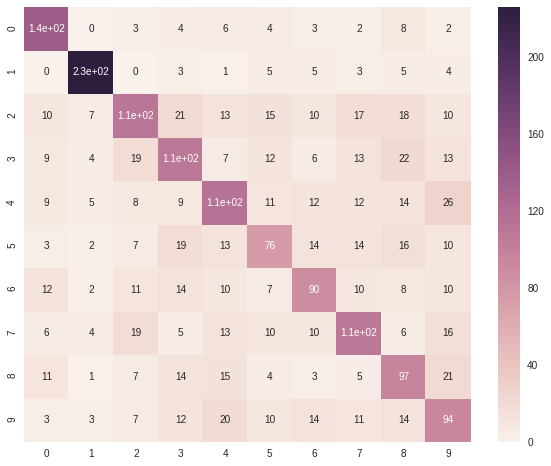

In [22]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

array = confusion_matrix(y_test, pred)
cm = pd.DataFrame(array, index = range(10), columns = range(10))
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True)